# The Relation Between Runs and Wins

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

Teams win by outscoring opponents. Exploring this relationship using MLB data from 2001-2024.

Data source: [Lahman Baseball Database](https://sabr.org/lahman-database/)

In [12]:
teams = pd.read_csv('../data/lahman/Teams.csv')

In [13]:
teams.tail(3)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
3581,2024,AL,TEX,TEX,W,3,162,81.0,78,84,...,106.0,0.987,Texas Rangers,Globe Life Field,2651553.0,96.0,96.0,TEX,TEX,TEX
3582,2024,AL,TOR,TOR,E,5,162,81.0,74,88,...,125.0,0.984,Toronto Blue Jays,Rogers Centre,2681236.0,103.0,103.0,TOR,TOR,TOR
3583,2024,NL,WAS,WSN,E,4,162,81.0,71,91,...,155.0,0.981,Washington Nationals,Nationals Park,1967302.0,96.0,98.0,WSN,MON,WAS


Filter to recent seasons and extract key variables:
- **R**: Runs scored
- **RA**: Runs allowed
- **W/L**: Wins and losses

In [99]:
my_teams = teams.loc[teams['yearID'] > 2000, ['teamID', 'name', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA']]
my_teams.head()

,teamID,name,yearID,lgID,G,W,L,R,RA
2864,ANA,Anaheim Angels,2001,AL,162,75,87,691.0,730.0
2865,ARI,Arizona Diamondbacks,2001,NL,162,92,70,818.0,677.0
2866,ATL,Atlanta Braves,2001,NL,162,88,74,729.0,643.0
2867,BAL,Baltimore Orioles,2001,AL,162,63,98,687.0,829.0
2868,BOS,Boston Red Sox,2001,AL,161,82,79,772.0,745.0


Calculate **Run Differential (RD)** and **Winning Percentage (Wpct)**:

In [100]:
my_teams['RD'] = my_teams['R'] - my_teams['RA']
my_teams['Wpct'] = my_teams['W'] / (my_teams['W'] + my_teams['L'])
my_teams.head()

,teamID,name,yearID,lgID,G,W,L,R,RA,RD,Wpct
2864,ANA,Anaheim Angels,2001,AL,162,75,87,691.0,730.0,-39.0,0.462963
2865,ARI,Arizona Diamondbacks,2001,NL,162,92,70,818.0,677.0,141.0,0.567901
2866,ATL,Atlanta Braves,2001,NL,162,88,74,729.0,643.0,86.0,0.543210
2867,BAL,Baltimore Orioles,2001,AL,162,63,98,687.0,829.0,-142.0,0.391304
2868,BOS,Boston Red Sox,2001,AL,161,82,79,772.0,745.0,27.0,0.509317


## Linear Regression:

$$Wpct = a + b \times RD + \epsilon$$


Plot relationship between **Run Differential (RD)** and **Winning Percentage (Wpct)** for 2001-2024 seasons

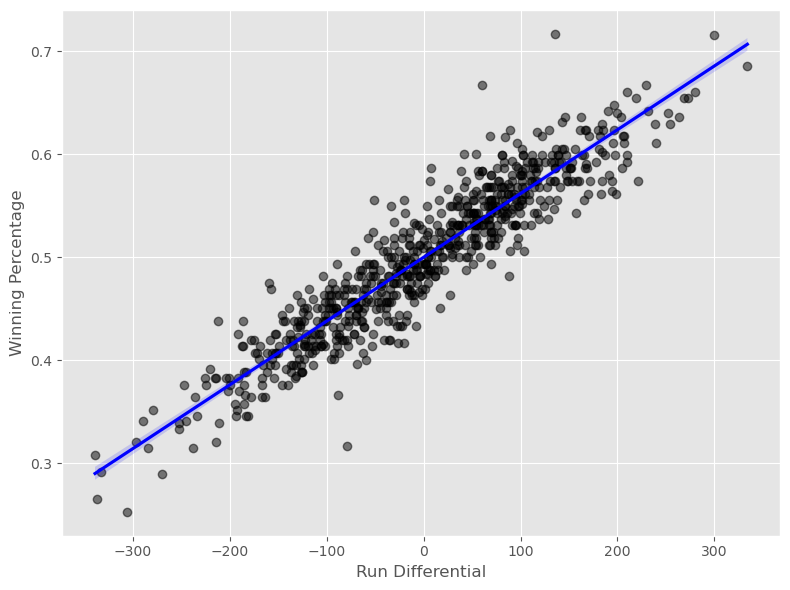

In [98]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=my_teams, x='RD', y='Wpct',
            scatter_kws={'color': 'black', 'alpha': 0.5},
            line_kws={'color': 'blue'})
ax.set_xlabel('Run Differential')
ax.set_ylabel('Winning Percentage')
plt.tight_layout()
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit linear regression model
X = my_teams[['RD']].values
y = my_teams['Wpct'].values

linfit = LinearRegression()
linfit.fit(X, y)

# Display coefficients
intercept = linfit.intercept_
slope = linfit.coef_[0]

print(f"Intercept (a): {intercept:.6f}")
print(f"Slope (b): {slope:.6f}")
print(f"Equation: Wpct = {intercept:.6f} + {slope:.6f} * RD")

Intercept (a): 0.499988
Slope (b): 0.000619
Equation: Wpct = 0.499988 + 0.000619 * RD


Interpretation:
- The **intercept** (≈0.500) represents the expected winning percentage when run differential is 0
- The **slope** (≈0.0006) means each additional run in differential increases winning percentage by about 0.0006
- A 10-run differential increase ≈ 0.006 winning percentage ≈ 1 additional win (out of 162 games)

In [ ]:
# Calculate predictions and residuals
my_teams['predicted_Wpct'] = linfit.predict(X)
my_teams['residuals'] = my_teams['Wpct'] - my_teams['predicted_Wpct']

# Calculate R-squared
r_squared = linfit.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# Calculate RMSE (Root Mean Square Error)
rmse = np.sqrt(np.mean(my_teams['residuals']**2))
print(f"RMSE: {rmse:.4f}")
print(f"This means predictions are accurate within about {rmse*100:.1f} percentage points")

R-squared: 0.8664
RMSE: 0.0277

This means predictions are accurate within about 2.8 percentage points


In [106]:
# View some examples with predictions and residuals
my_teams[['name', 'yearID', 'W', 'L', 'RD', 'Wpct', 'predicted_Wpct', 'residuals']].sample(10)

,name,yearID,W,L,RD,Wpct,predicted_Wpct,residuals
3505,Kansas City Royals,2022,65,97,-170.0,0.401235,0.394812,0.006422
3050,Cincinnati Reds,2007,72,90,-70.0,0.444444,0.456680,-0.012236
3195,Atlanta Braves,2012,94,68,100.0,0.580247,0.561856,0.018391
3164,Arizona Diamondbacks,2011,94,68,69.0,0.580247,0.542676,0.037570
3540,Minnesota Twins,2023,87,75,119.0,0.537037,0.573610,-0.036573
3346,Baltimore Orioles,2017,75,87,-98.0,0.462963,0.439357,0.023606
3333,Oakland Athletics,2016,69,93,-108.0,0.425926,0.433170,-0.007245
3503,Detroit Tigers,2022,66,96,-156.0,0.407407,0.403474,0.003934
3547,Seattle Mariners,2023,88,74,99.0,0.543210,0.561237,-0.018027
3463,Washington Nationals,2020,26,34,-8.0,0.433333,0.495038,-0.061705
